## MULTIPLE LINEAR REGRESSION

# Tasks:

### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.


In [138]:
import pandas as pd
data=pd.read_csv('ToyotaCorolla - MLR.csv')

In [139]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [141]:
df=pd.DataFrame(data)

In [142]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [143]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [144]:
for col in df.select_dtypes(include=['number']):
    Q1=df[col].quantile(.25)
    Q3=df[col].quantile(.75)
    IQR=Q3-Q1
    
    upper=Q3+(1.5*IQR)
    lower=Q1-(1.5*IQR)
    outlier=df[(df[col]>upper)|(df[col]<lower)]
    
    print("\n\n",col)
    print(f"Upper {upper}")
    print(f"Lower {lower}")
    print(f"Outliers {len(outlier)}")



 Price
Upper 17200.0
Lower 3200.0
Outliers 110


 Age_08_04
Upper 109.0
Lower 5.0
Outliers 7


 KM
Upper 153051.875
Lower -23031.125
Outliers 49


 HP
Upper 140.0
Lower 60.0
Outliers 11


 Automatic
Upper 0.0
Lower 0.0
Outliers 80


 cc
Upper 1900.0
Lower 1100.0
Outliers 123


 Doors
Upper 8.0
Lower 0.0
Outliers 0


 Cylinders
Upper 4.0
Lower 4.0
Outliers 0


 Gears
Upper 5.0
Lower 5.0
Outliers 46


 Weight
Upper 1152.5
Lower 972.5
Outliers 66


In [145]:
def outlier(df,col):
    Q1=df[col].quantile(.25)
    Q3=df[col].quantile(.75)
    IQR=Q3-Q1
    
    upper=Q3+(1.5*IQR)
    lower=Q1-(1.5*IQR)
    outlier=df[(df[col]>upper)|(df[col]<lower)]
    
    return upper,lower

def replace(df):
    df_clean=df.copy()
    
    for col in df_clean.select_dtypes(include=['number']):
        upper,lower=outlier(df_clean,col)
        df.loc[df_clean[col]>upper,col]=upper
        df.loc[df_clean[col]<lower,col]=lower
    
    return df_clean

In [146]:

df_clean=replace(df)
for col in df_clean.select_dtypes(include=['number']):
    Q1=df_clean[col].quantile(.25)
    Q3=df_clean[col].quantile(.75)
    IQR=Q3-Q1
    
    upper=Q3+(1.5*IQR)
    lower=Q1-(1.5*IQR)
    outlier=df_clean[(df[col]>upper)|(df_clean[col]<lower)]
    
    print("\n\n",col)
    print(f"Upper {upper}")
    print(f"Lower {lower}")
    print(f"Outliers {len(outlier)}")



 Price
Upper 17200.0
Lower 3200.0
Outliers 0


 Age_08_04
Upper 109.0
Lower 5.0
Outliers 7


 KM
Upper 153051.875
Lower -23031.125
Outliers 0


 HP
Upper 140.0
Lower 60.0
Outliers 0


 Automatic
Upper 0.0
Lower 0.0
Outliers 0


 cc
Upper 1900.0
Lower 1100.0
Outliers 0


 Doors
Upper 8.0
Lower 0.0
Outliers 0


 Cylinders
Upper 4.0
Lower 4.0
Outliers 0


 Gears
Upper 5.0
Lower 5.0
Outliers 3


 Weight
Upper 1152.5
Lower 972.5
Outliers 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_22784\1508677231.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '153051.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df_clean[col]>upper,col]=upper
C:\Users\DELL\AppData\Local\Temp\ipykernel_22784\1508677231.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1152.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df_clean[col]>upper,col]=upper


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

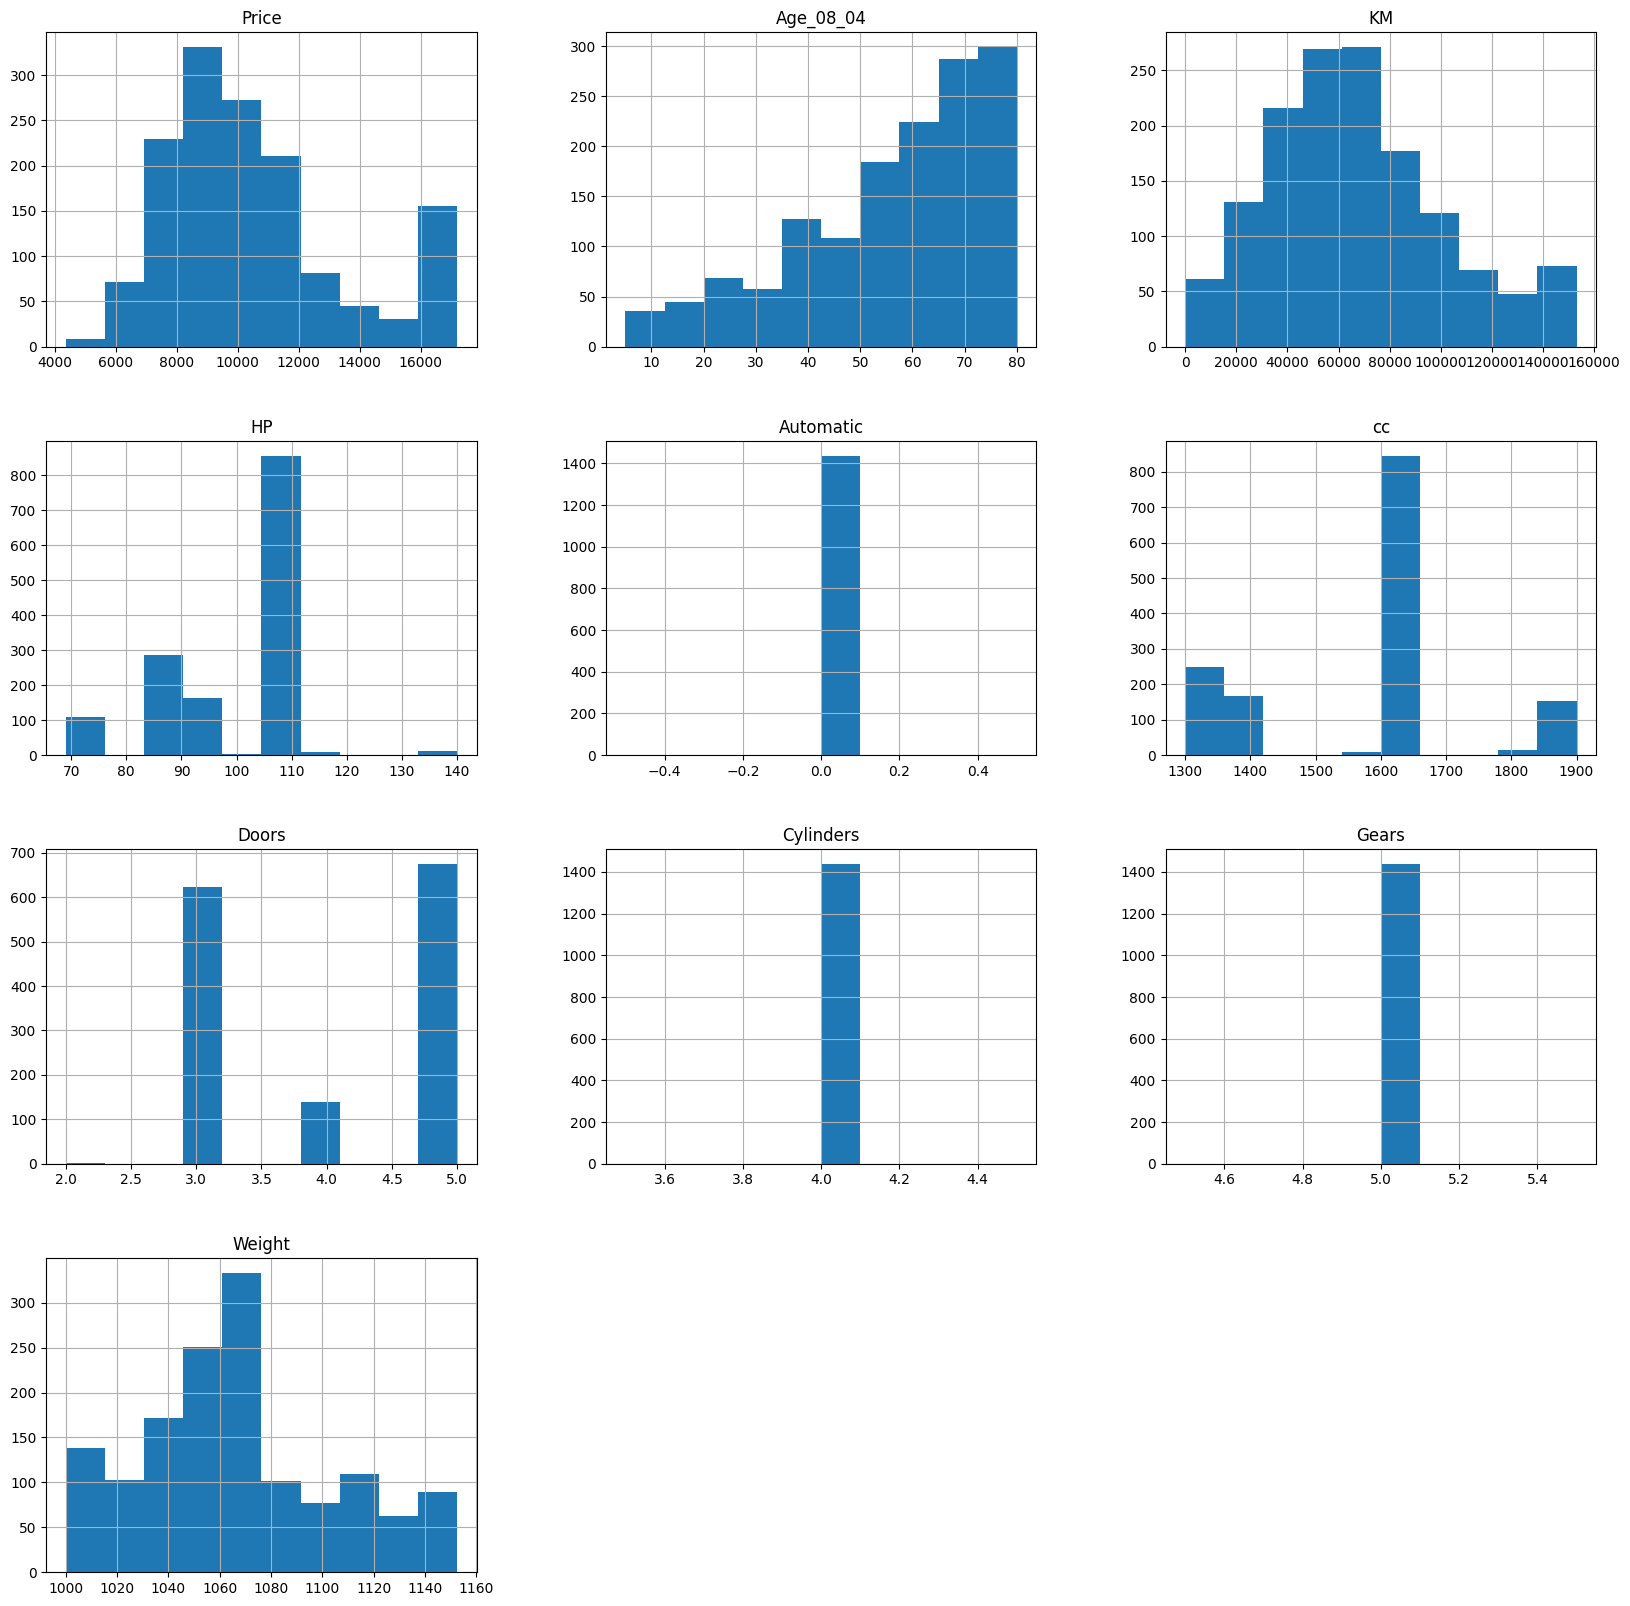

In [147]:
df.hist(figsize=(20,20))

<Axes: >

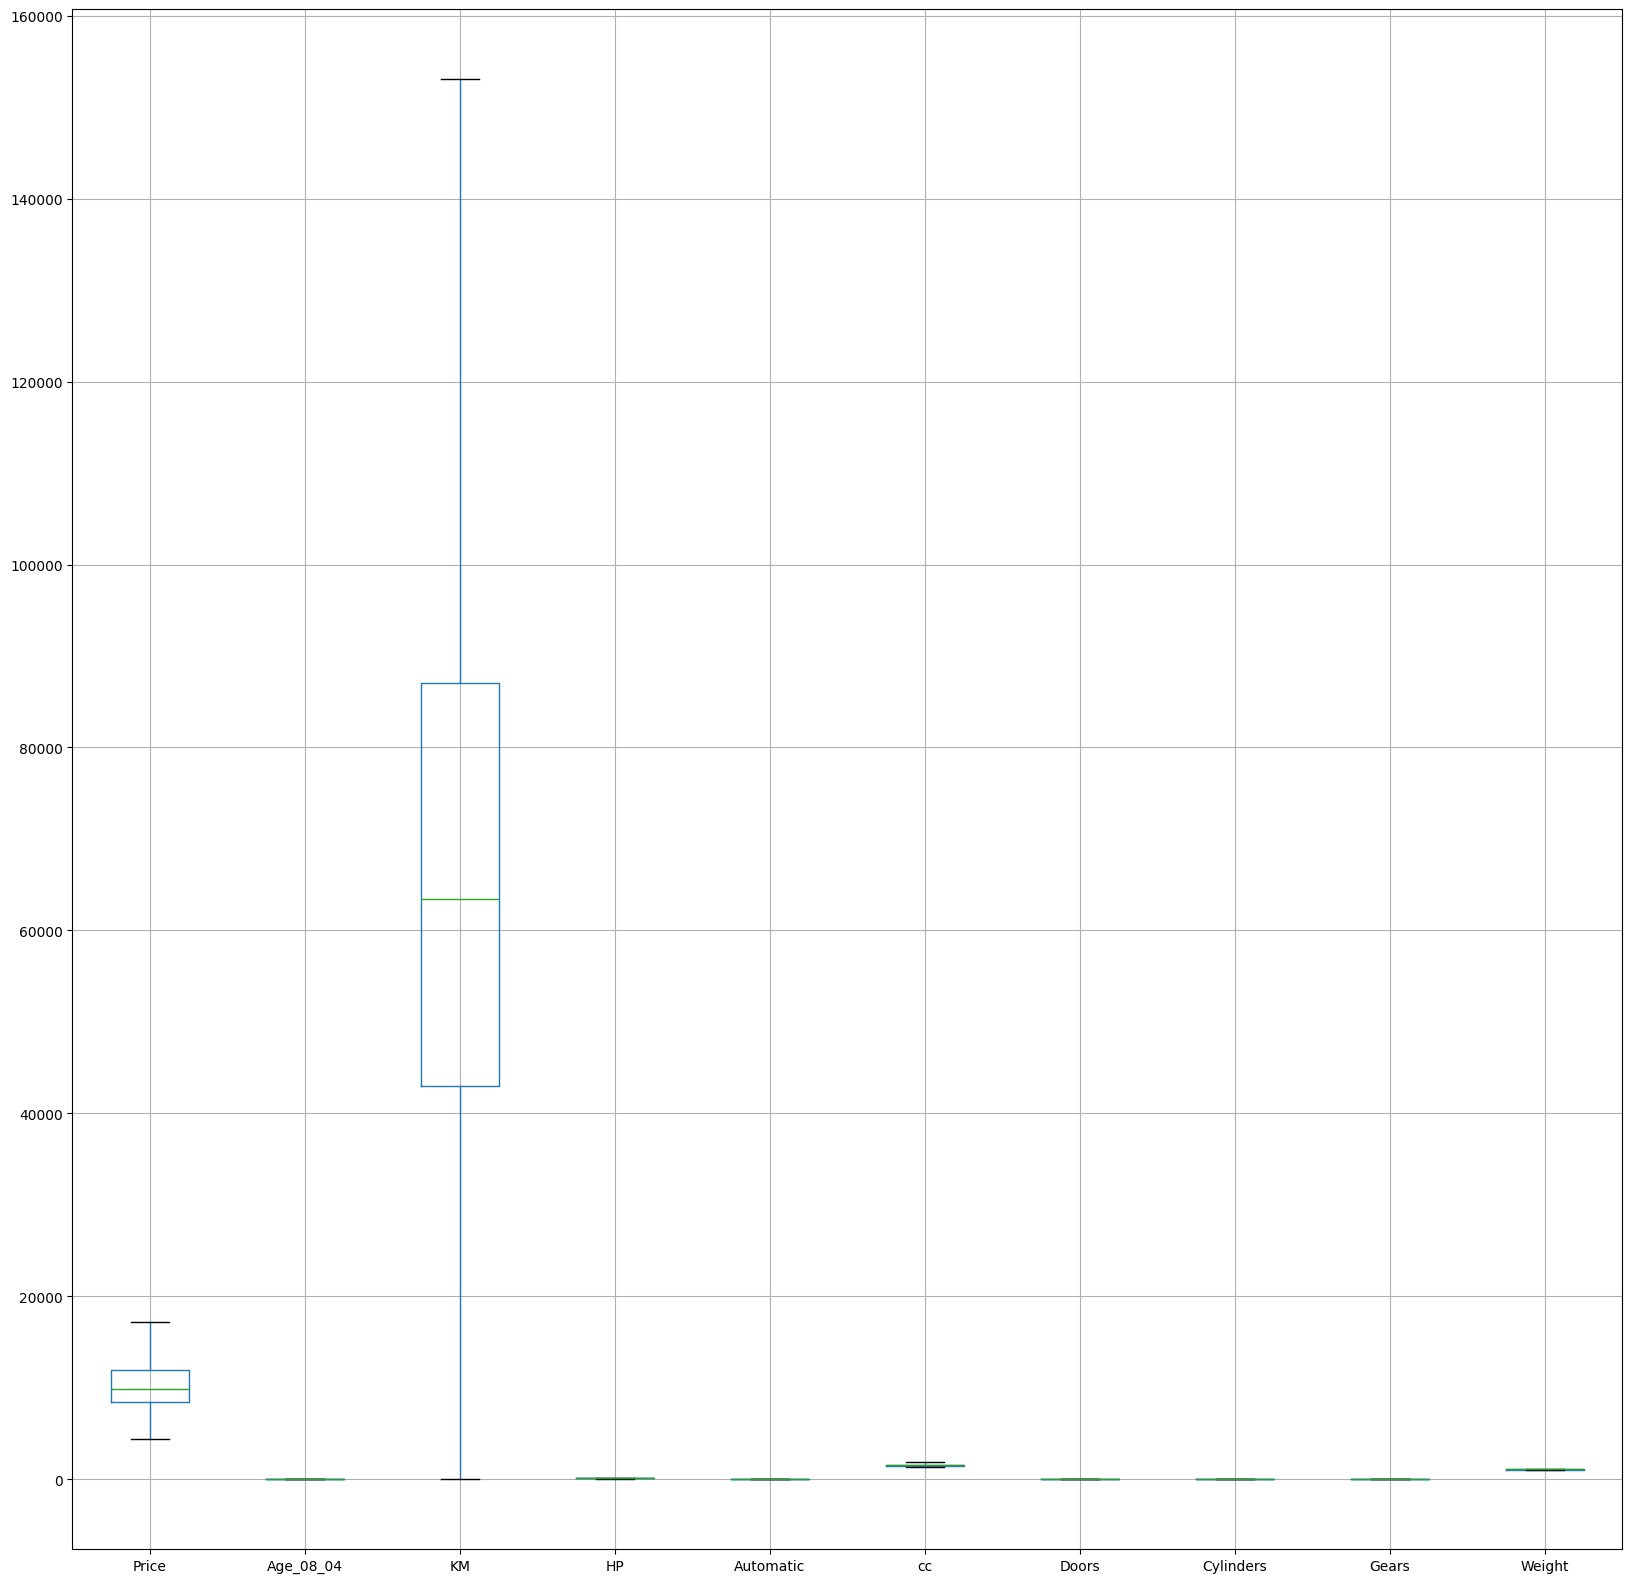

In [148]:
df.boxplot(figsize=(20,20))

<Axes: xlabel='Fuel_Type'>

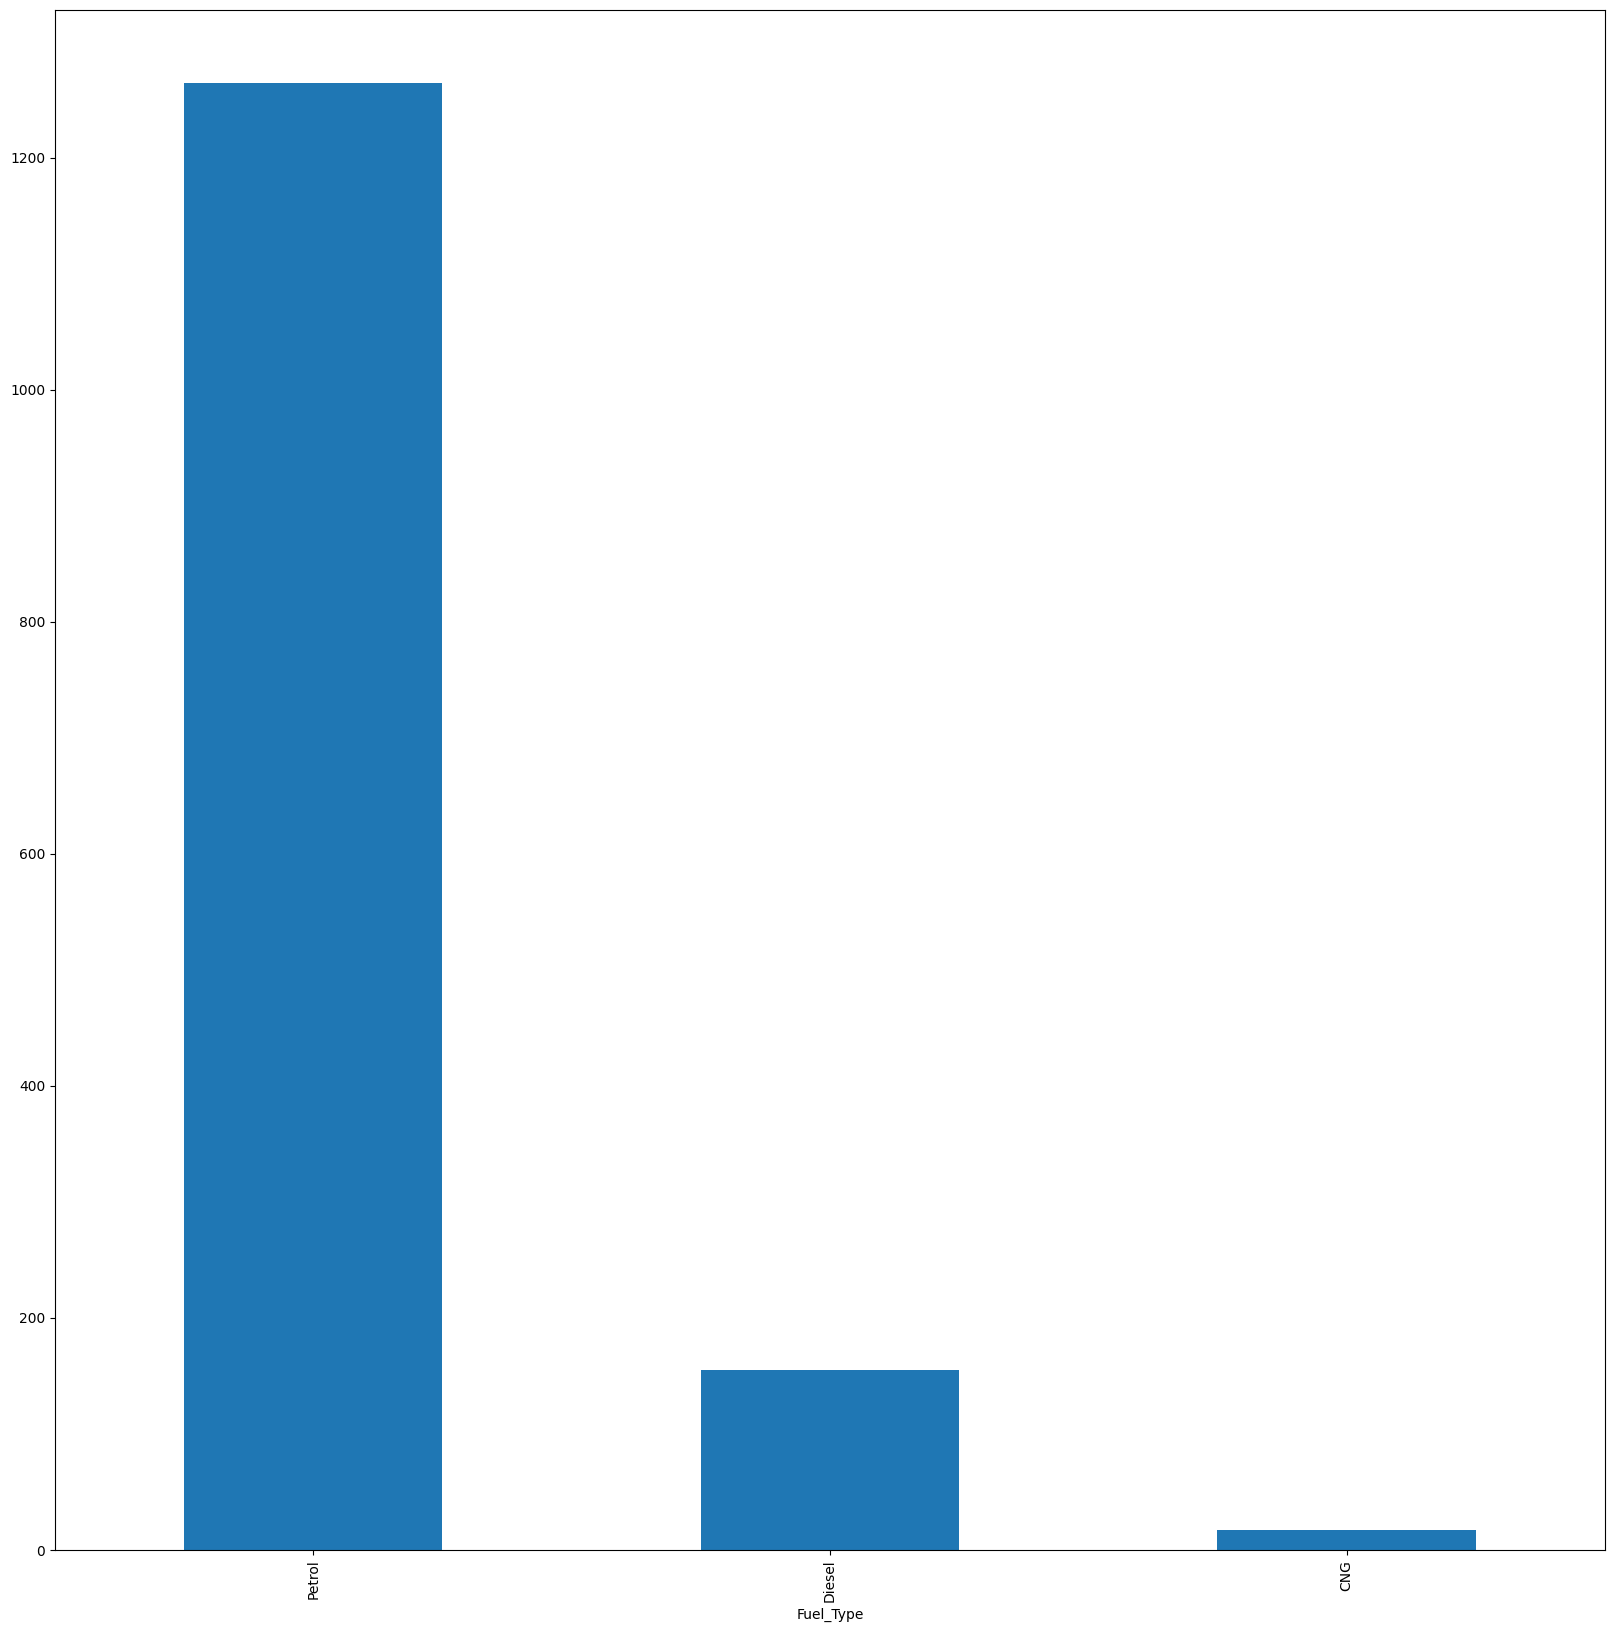

In [ ]:
df['Fuel_Type'].value_counts().plot(kind='bar',figsize=(20,20))
#The amount of petrol used is higher than the others and second highest is disel and third least is CNG

<Axes: ylabel='count'>

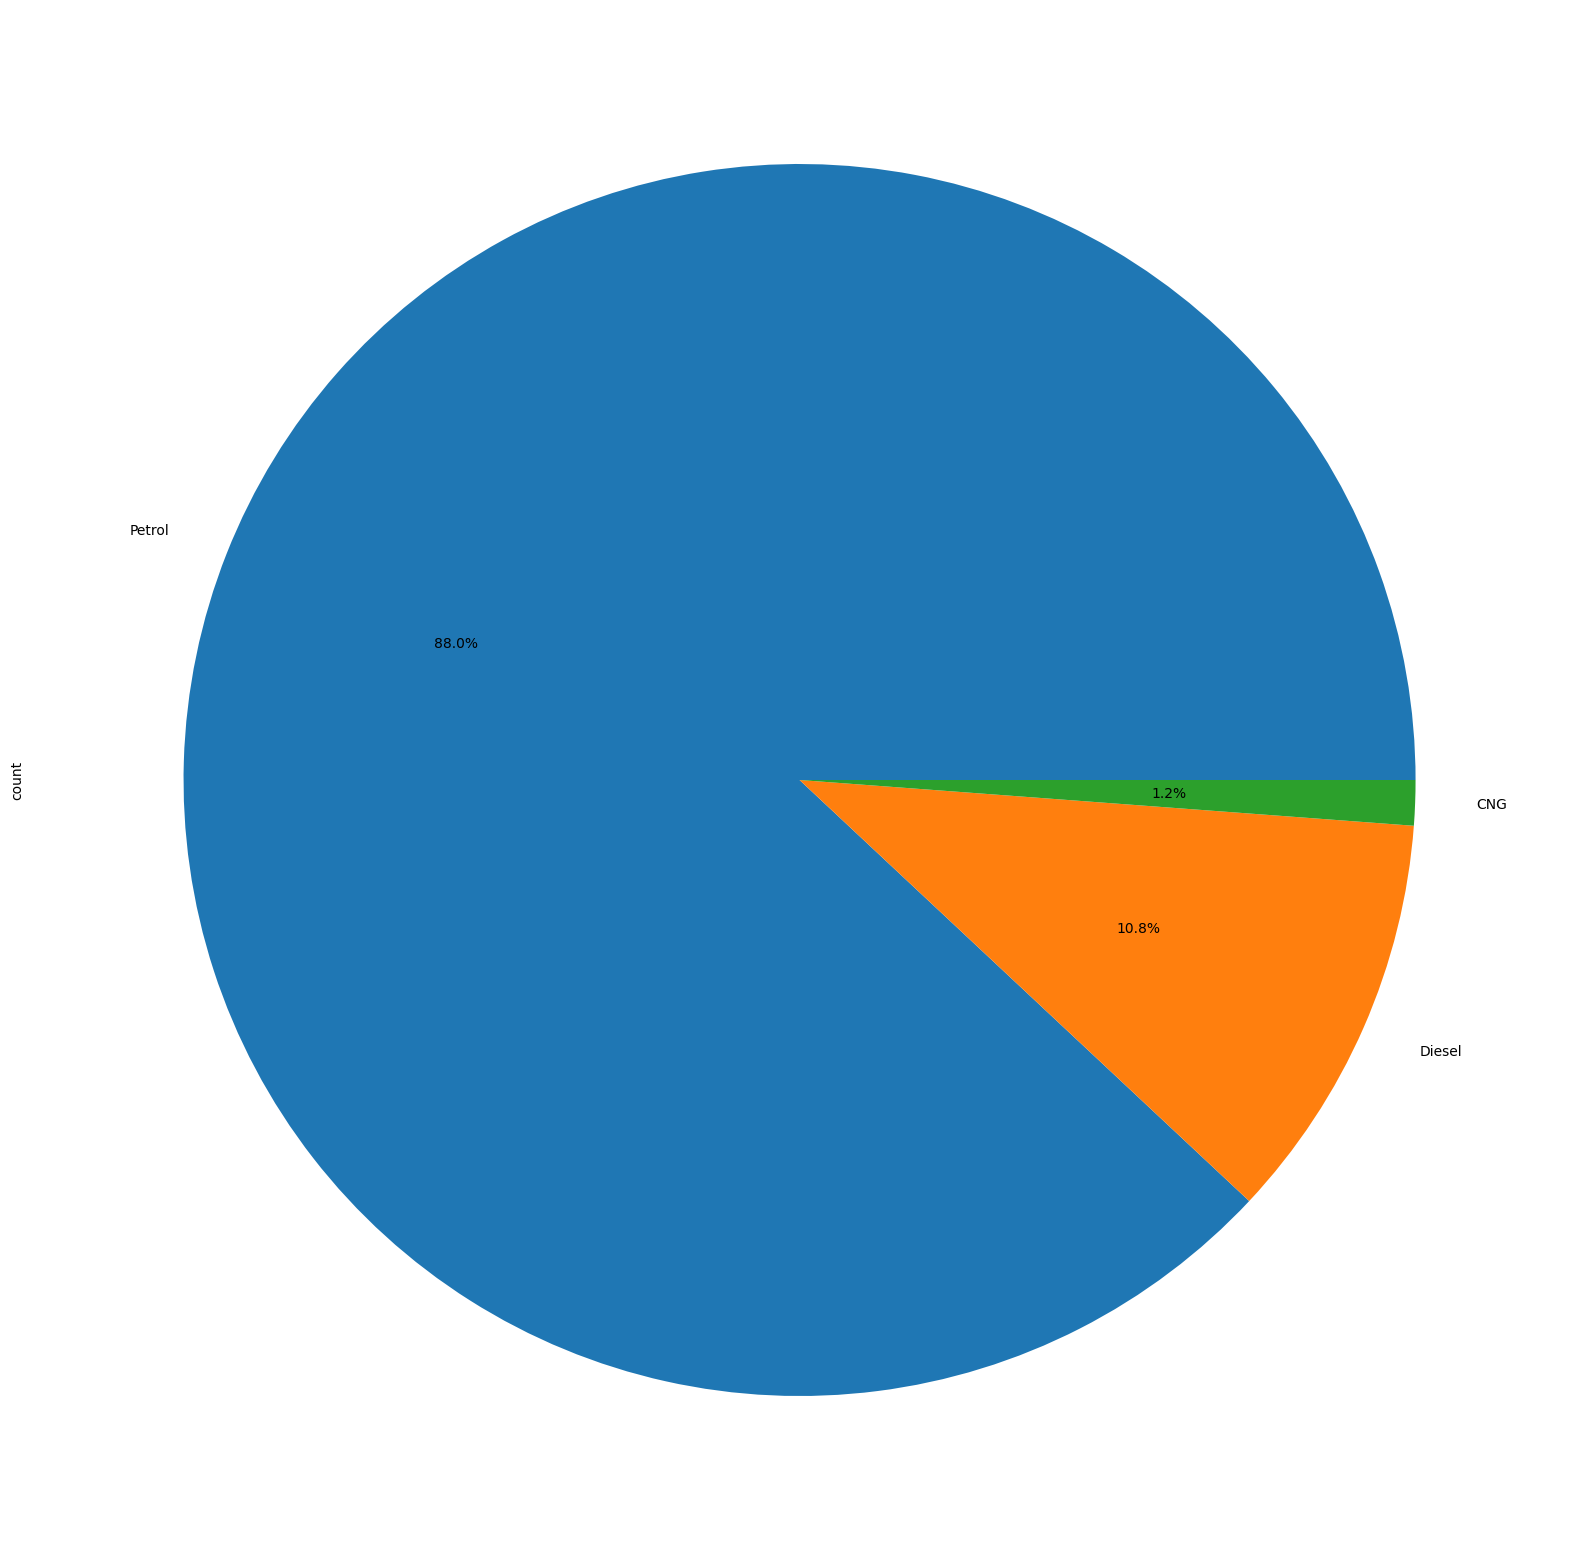

In [ ]:
df['Fuel_Type'].value_counts().plot(kind='pie',figsize=(20,20),autopct='%1.1f%%') 
#Here it shows petrol percentage is more that is 88% of vehicles use petrol

In [151]:
print(df['Fuel_Type'].unique())

['Diesel' 'Petrol' 'CNG']


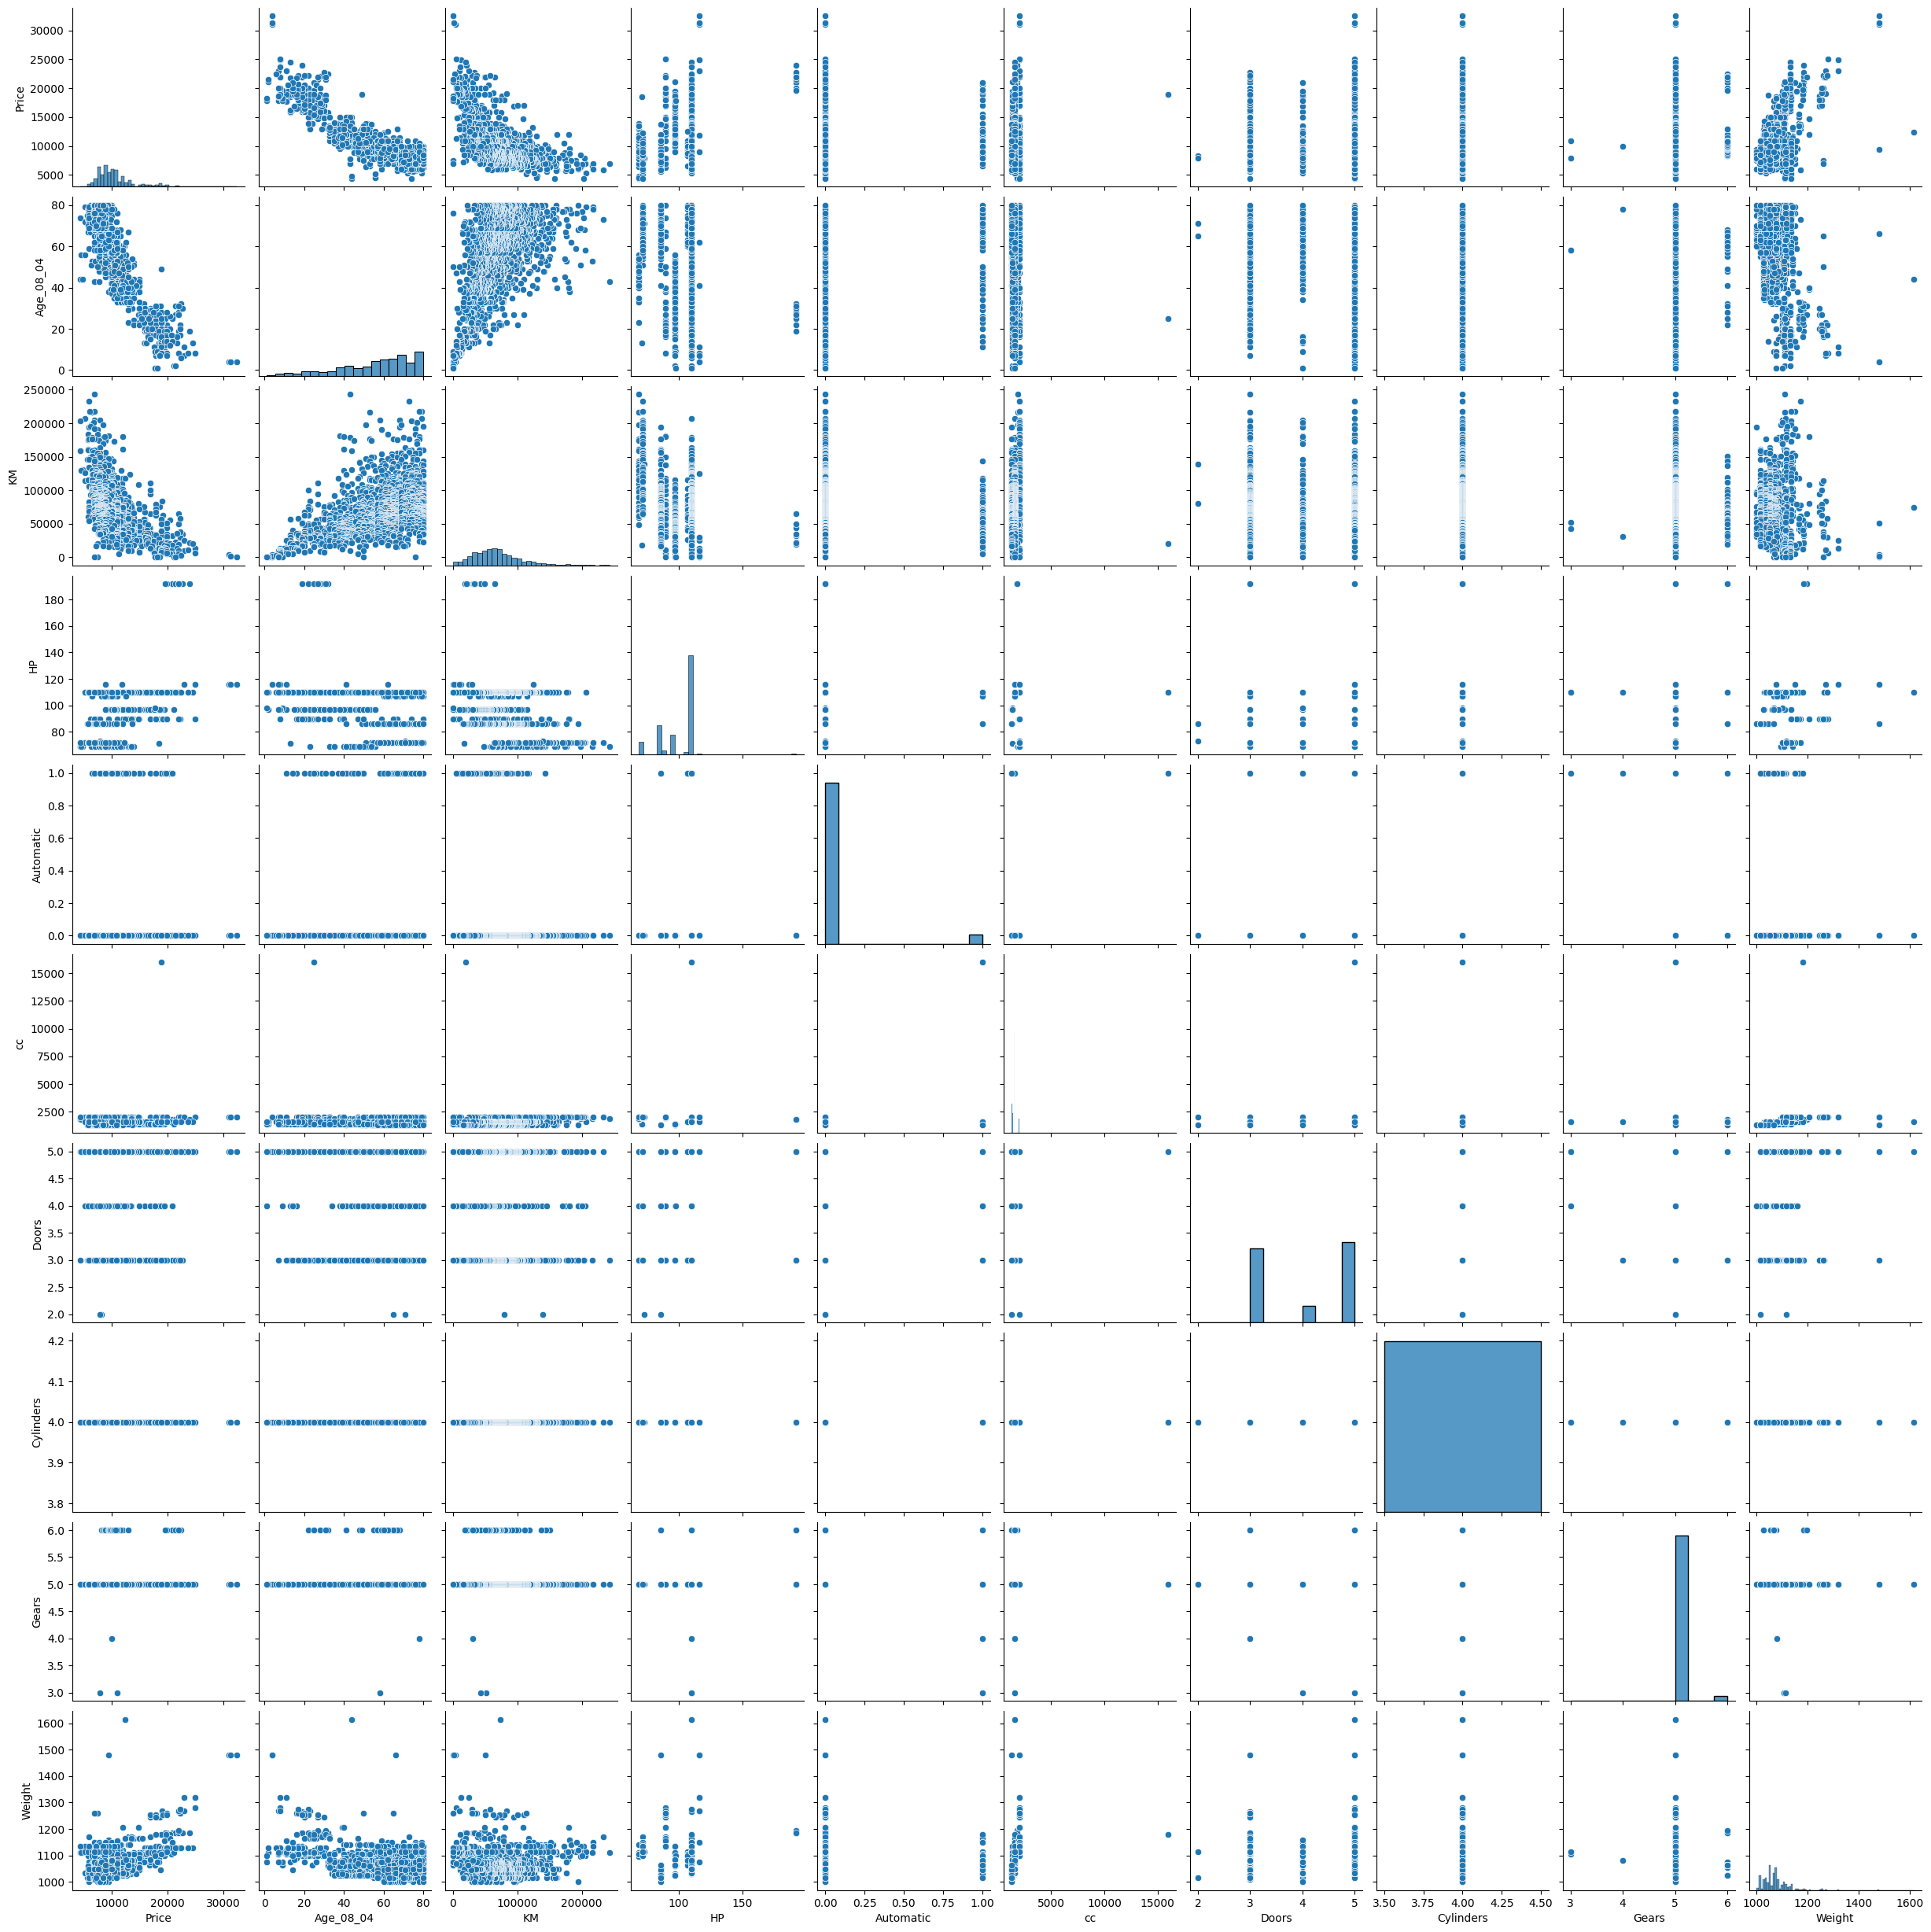

In [152]:
import seaborn as sns
sns.pairplot(df_clean)

<Axes: >

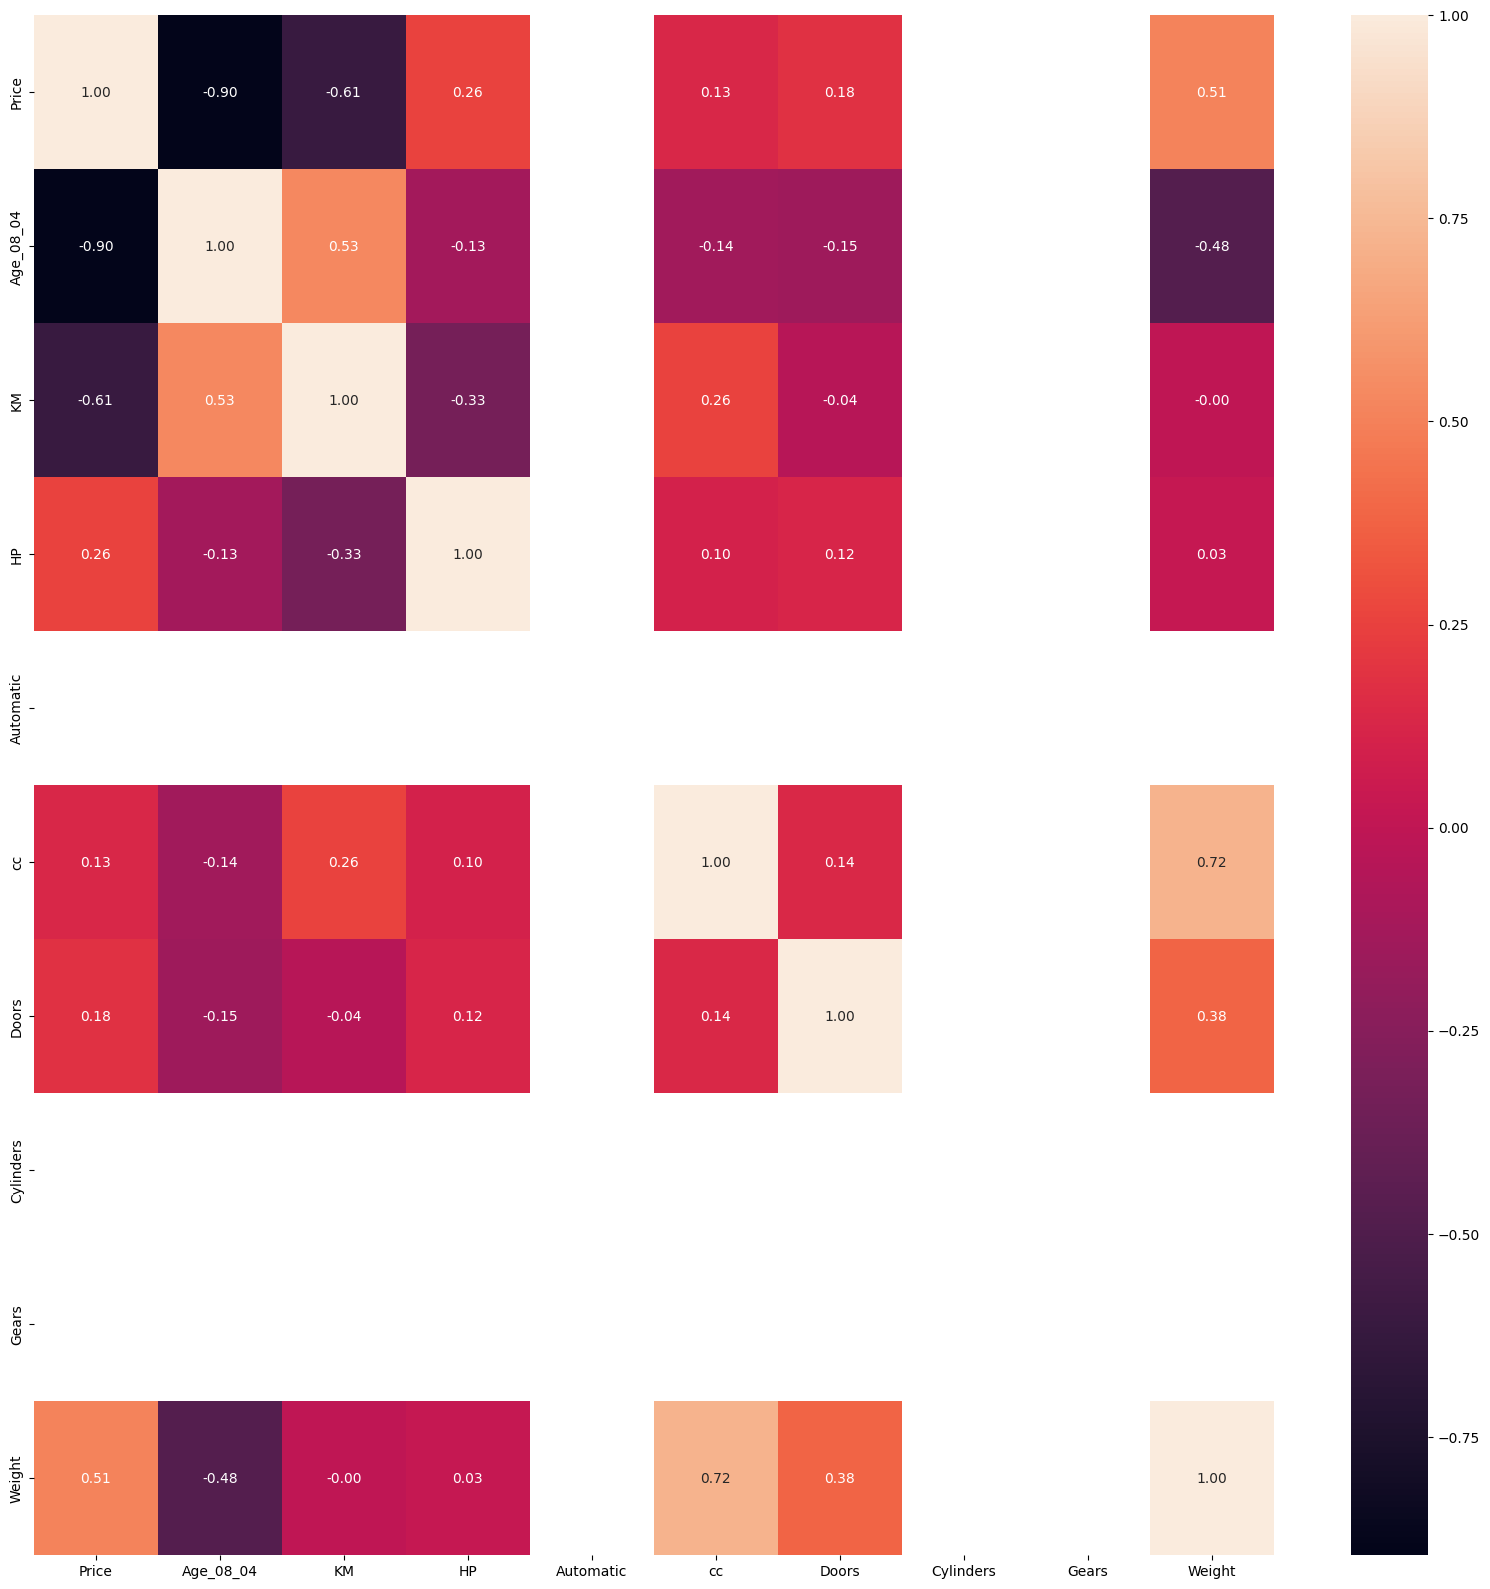

In [153]:

df_numerical=df.select_dtypes(include=['number'])
corr=df_numerical.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt='.2f')

<Axes: >

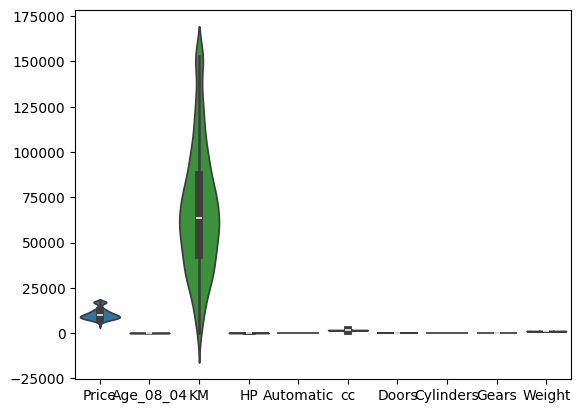

In [154]:
sns.violinplot(df)

### 2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [169]:
from sklearn.model_selection import train_test_split
x=df.drop(['Price'],axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [170]:
print(x.shape)
print(y.shape)

(1436, 10)
(1436,)


In [171]:
print(x_train.shape)
print(y_train.shape)

(1148, 10)
(1148,)


In [172]:
print(x_test.shape)
print(x_test.shape)

(288, 10)
(288, 10)


In [173]:
total_rows=df.shape[0]
train_percentage=(x_train.shape[0]/total_rows)*100
test_percentage=(x_test.shape[0]/total_rows)*100
print('train percentage:',train_percentage)
print('test percentage:',test_percentage)

train percentage: 79.94428969359332
test percentage: 20.055710306406684


### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

In [202]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

### Model 1

In [194]:
x=df.drop(['Price'],axis=1)
y=df['Price']
x=pd.get_dummies(x,drop_first=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,)

In [199]:
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)

### Model 2

In [184]:
x_train2=x_train[['KM','HP']]
x_test2=x_test[['KM','HP']]

In [207]:
model2=LinearRegression()
model2.fit(x_train2,y_train)
y_pred2=model2.predict(x_test2)

### Model 3

In [188]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)

In [209]:
model3=LinearRegression()
model3.fit(x_train_scaler,y_train)
y_pred3=model3.predict(x_test_scaler)

### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [206]:
print('Mean_Squared Error for Model 1: ',mean_squared_error(y_test,y_pred))
print('Mean_Absolute Error for Model 1: ',mean_absolute_error(y_test,y_pred))
print('r2 Score for Model 1: ',r2_score(y_test,y_pred))

Mean_Squared Error for Model 1:  1270018.5822106672
Mean_Absolute Error for Model 1:  844.2697720386582
r2 Score for Model 1:  0.8489918922107229


In [208]:
print('Mean_Squared Error: ',mean_squared_error(y_test,y_pred2))
print('Mean_Absolute Error: ',mean_absolute_error(y_test,y_pred2))
print('r2 Score: ',r2_score(y_test,y_pred2))

Mean_Squared Error:  8588731.670614185
Mean_Absolute Error:  2371.54662775341
r2 Score:  -0.02121979635267013


In [210]:
print('Mean_Squared Error: ',mean_squared_error(y_test,y_pred3))
print('Mean_Absolute Error: ',mean_absolute_error(y_test,y_pred3))
print('r2 Score: ',r2_score(y_test,y_pred3))

Mean_Squared Error:  8613371.789914122
Mean_Absolute Error:  2387.9652109412486
r2 Score:  -0.02414956276971658


### 5.Apply Lasso and Ridge methods on the model.

In [211]:
from sklearn.linear_model import Lasso,Ridge

In [ ]:
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)
y_pred_lasso=lasso_model.predict(x_test)
print('Mean_Squared Error for Lasso Model: ',mean_squared_error(y_test,y_pred_lasso))
print('Mean_Absolute Error for Lasso Model: ',mean_absolute_error(y_test,y_pred_lasso))
print('r2 Score for Lasso Model: ',r2_score(y_test,y_pred_lasso))


Mean_Squared Error for Model 1:  1271139.257667959
Mean_Absolute Error for Model 1:  844.5100688031632
r2 Score for Model 1:  0.8488586413413088


In [ ]:
ridge_model=Ridge()
ridge_model.fit(x_train,y_train)
y_pred_ridge=ridge_model.predict(x_test)
print('Mean_Squared Error for Ridge Model: ',mean_squared_error(y_test,y_pred_ridge))
print('Mean_Absolute Error for Ridge Model: ',mean_absolute_error(y_test,y_pred_ridge))
print('r2 Score for Ridge Model: ',r2_score(y_test,y_pred_ridge))

Mean_Squared Error for Ridge Model:  1272809.5979862937
Mean_Absolute Error for Ridge Model:  844.6606421210731
r2 Score for Ridge Model:  0.8486600340655029


## Interview Questions(For our Reference):


### 1.What is Normalization & Standardization and how is it helpful?

### Normalization:

It is also called Min-Max scaling.

Scales the data to a specific range, usually 0 to 1.

Formula:

X norm = (X - X max)/(X max - X min)

It is helpful for algorithms sensitive to scale(e.g: KNN, Neural Networks)

### Standardization

It is also called Z-score scaling.

Centers the data around 0 and scales it to have a standard deviation of 1.

Formula:

X std = X max - mu/sigma

It is helpful for algorithms assuming normally distributed data(e.g: Linear Regression, Logistic Regression, SVM.)

### Difference:

Normalization :- scales to fixed range (0–1)

Standardization :-  scales to mean=0, std=1

### 2.What techniques can be used to address multicollinearity in multiple linear regression?

1. Remove Highly Correlated Features(Drop features with high correlation)

2. Combine Features(Merge Correlated Features using PCA)

3. Lasso and Ridge Method(Lasso can make some coefficients to zero and Ridge can reduce large coefficients)

4. Collection of more data helps to address multicollinearity

5. Centering or Standardizing Variables